## Multiple Linear Regression

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

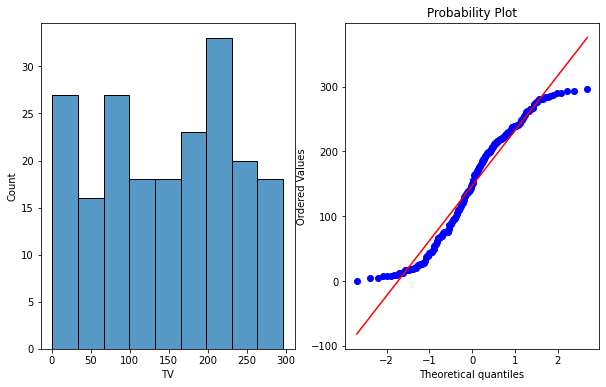

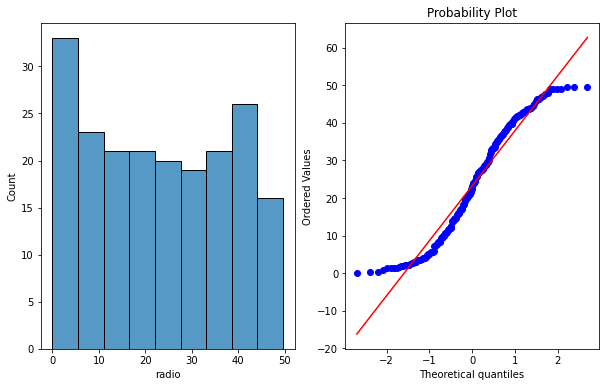

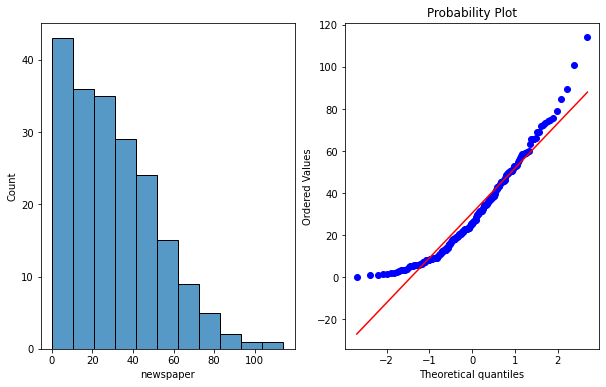

In [8]:
for col in df.drop("sales", axis =1).columns:
    check_dist(df, col)

## Data Preparation

In [9]:
from scipy.stats import skew
for i in df.drop(columns= "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


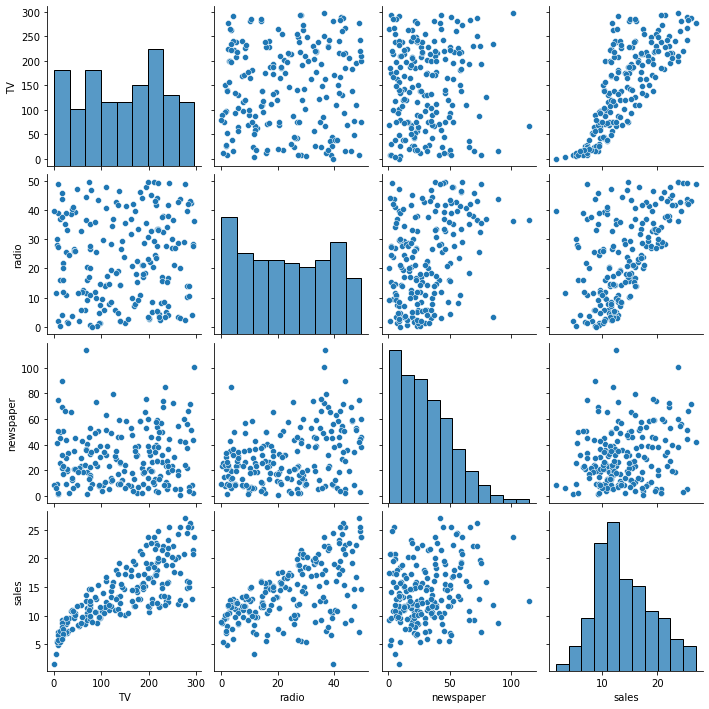

In [10]:
sns.pairplot(df);

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


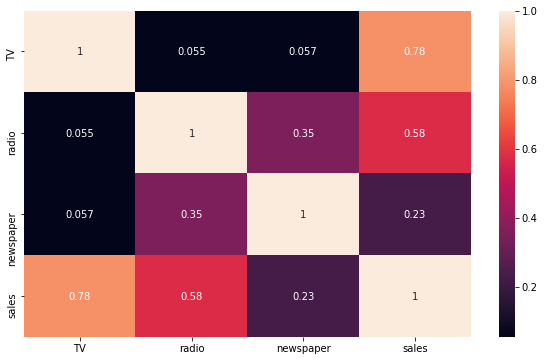

In [12]:
sns.heatmap(df.corr(), annot = True);

## Train-Test Split

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
X = df[["TV", "radio", "newspaper"]] # X=df.drop(columns = "sales")
y = df["sales"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# testsize generally used % 30

In [17]:
X_train.shape

(140, 3)

In [18]:
X_test.shape

(60, 3)

In [19]:
y_train.shape

(140,)

In [20]:
y_test.shape

(60,)

## Model Fitting and Compare Actual and Predicted Labels

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [26]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test-y_pred}

In [27]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


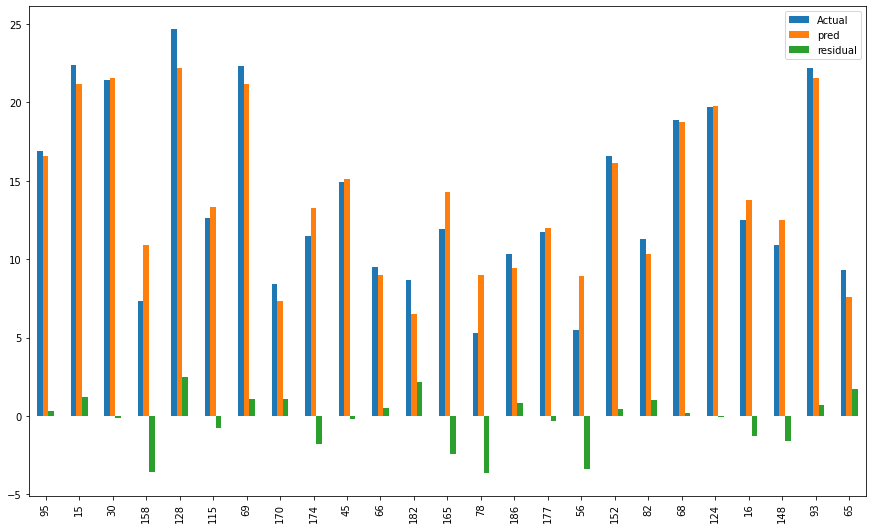

In [28]:
result_sample = comparing.head(25)
result_sample.plot(kind = "bar", figsize = (15,9))
plt.show()

## Error Metrics

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549084

In [33]:
mse = mean_squared_error(y_test, y_pred)
mse

3.7967972367152183

In [34]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446383

In [35]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [36]:
mae / sales_mean

# sales ortalamam 14 idi, mae ortalamam 1.5 idi. 1.5'u 14'e bölersem 1.5'un 14'ün yüzde kaçı olduğunu bulmuş olurum.

0.10780311802138763

In [37]:
rmse / sales_mean

0.13895790367941793

## What is the concept of punishment for RMSE error metric?

In [38]:
variables = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3200]}

variables2 = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3600]} # RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 3600 yaptım.

In [39]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200


In [40]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3600


In [41]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
                       
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200


In [42]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
                       
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3600,600


In [43]:
# mae

df_2.residual.sum() / 3 # 166.66

166.66666666666666

In [44]:
df_3.residual.sum() / 3 

# pred'in bir değerini 3600 yaptığımda mae 166.66 dan 300 e çıktı!

300.0

In [45]:
# rmse 

((df_2.residual ** 2).sum() / 3) ** 0.5

173.20508075688772

In [46]:
((df_3.residual ** 2).sum() / 3) ** 0.5

369.68455021364724

## Evaluation Model

In [47]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [48]:
eval_metric(y_test, y_pred)

# modelimi test ettiğim test datamın eval metrik değelerini çıkarttım.

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.7967972367152183
RMSE 		: 1.9485372043446383


In [49]:
y_train_pred = model.predict(X_train)

In [50]:
eval_metric(y_train, y_train_pred)

# modelimi eğittiğim train datamın eval metrik değelerini çıkarttım. Test datamın eval metrik değerleri ile bunu kıyaslayacağım.

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057875
RMSE 		: 1.5745968305905444


## Is data suitable for linear regression?

## Plotting residuals

In [51]:
residuals = y_test - y_pred

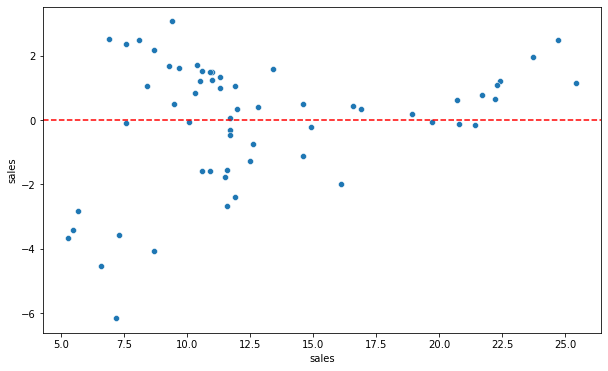

In [52]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()

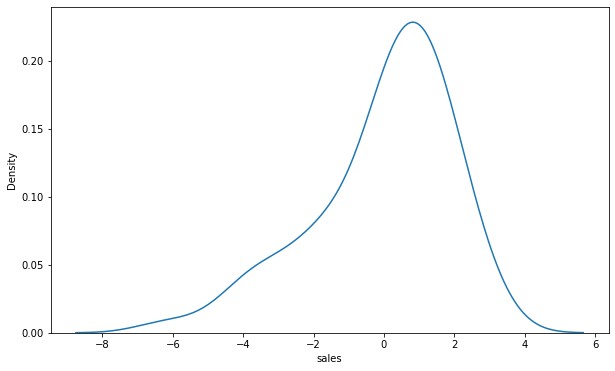

In [54]:
sns.kdeplot(residuals); # left skewed olduğu görülüyor.

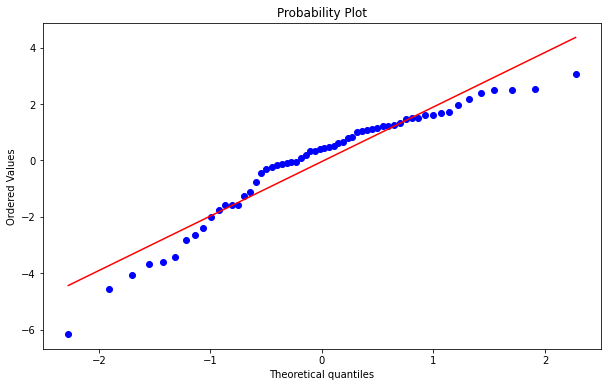

In [55]:
stats.probplot(residuals, dist="norm", plot=plt);

# verilerim kırmızı çizginin etrafında sarmaşık gibi dolanıyorsa normal dağılıma yakın demektir.

In [56]:
skew(residuals)

-0.9865673346742737

In [58]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [59]:
from yellowbrick.regressor import ResidualsPlot

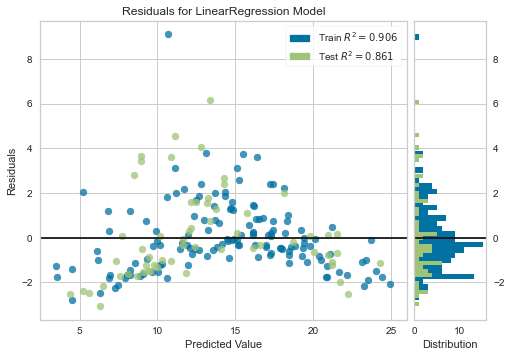

In [60]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

In [61]:
from yellowbrick.regressor import PredictionError

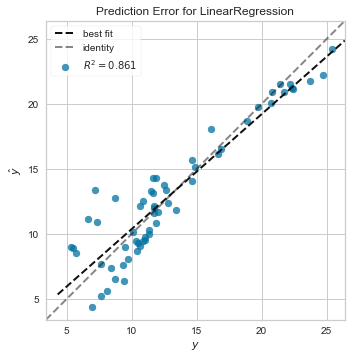

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [62]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Retraining Model on Full Data

In [63]:
final_model = LinearRegression()

In [64]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

## Prediction on New Data

## Feature importance (The effect of features on the predicted label)